# Exploring Kernelization


## Objectives

1. **Understanding Theory of Kernelization:** Explore kernel functions, the kernel trick, and their mathematical foundations.
2. **Apply Kernel Methods:** Learn how kernelization is used in Support Vector Machines (SVMs) and other algoriths to handle non-linear data.
3. **Impliment a Kernelized Model:** Use Python to impliment a kernelized SVM on a dataset and interpret the results.
4. **Visualize Results:** Provide visualizations to show the effect of different kernel functions on the model's performance.


## Project Outline

1. **Introduction to Kernilization**
   - What is Kernilization in machine learning?
   - Motivation: Why we need kernel functions for handling non-linear data.
   - Applications of kernel methods in machine learning (e.g., Support Vector Machines, Kernel PCA, Gaussian Processes).

2. **Mathematical Foundations**
   - **Kernel Functions:** Definition and properties (Mercer's theorem).
   - **The Kernel Trick:** Explanation of how kernels enable linear algorithms to work in non-linear spaces.
   - **Common Kernels:**
     - Linear Kernel: $K(x,y)=x\cdot y$
     - Polynomial Kernel: $K(x,y)=(x\cdot y+x)^d$
     - Radial Basis Function (RBF) Kernel: $K(x,y)=\exp{-\gamma||x-y||^2}$
     - Sigmoid Kernel: $K(x,y)=\tanh{(\alpha x\cdot y+c)}$
   - **Choosing a Kernel:** Discuss how to select appropriate kernel functions based on the problem and dataset characteristics.

3. **Example: Kernelized Support Vectore Machine**
   - **Dataset Selection:** Choose a dataset suitable for non-linear classification (e.g., the Iris dataset or synthetic data with non-linear separability).
   - **Implementation:** Use Python with scikit-learn to implement an SVM classifier with different kernel functions.
   - **Comparison of Kernels:** Train and evaluate the SVM model using different kernels (linear, polynomial, RBF) to illustrate the effect of kernel choice on classification performance.
   - **Visualization:** Visualize decision boundaries for each kernel to show the separation of classes.

4. Conclusion and Analysis
   - Summarize the importance of kernelization in handling non-linear problems.
   - Analyze how different kernels affect model performance and decision boundaries.
   - Discuss limitations and potential future directions for kernel methods in machine learning.


## Dataset

For this project, we’ll use the **Iris dataset** as it contains non-linear class separability, making it ideal for demonstrating kernelization.


## Python Implementation

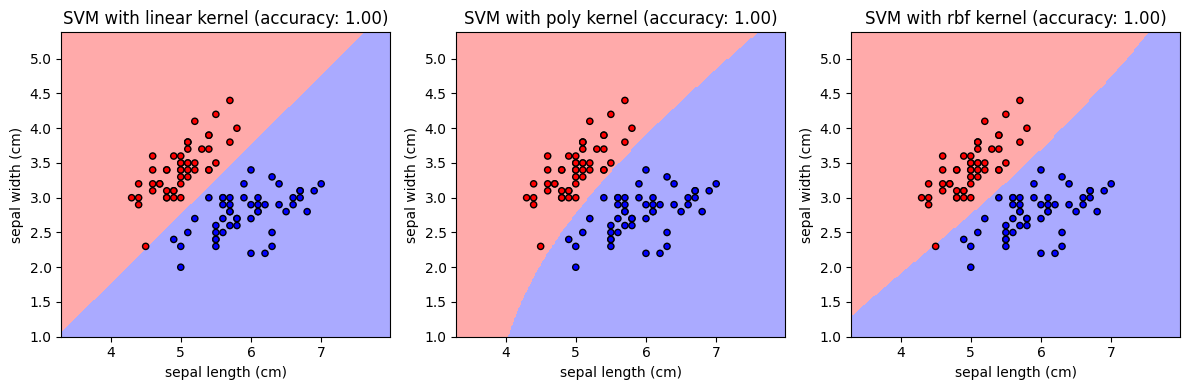

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Load Iris dataset and select two features for visualization
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for easy visualization
y = iris.target

# Select only two classes (class 0 and class 1) for binary classification
mask = y != 2
X = X[mask]
y = y[mask]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

# List of kernels to test
kernels = ['linear', 'poly', 'rbf']

plt.figure(figsize=(12, 4))

for i, kernel in enumerate(kernels, 1):
    # Train SVM with the specified kernel
    clf = SVC(kernel=kernel, degree=3, C=1, gamma='scale')
    clf.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Plot decision boundary
    plt.subplot(1, 3, i)
    plot_decision_boundary(clf, X, y, f"SVM with {kernel} kernel (accuracy: {accuracy:.2f})")

plt.tight_layout()
plt.show()


## Explanation of the Code

1. **Data Preparation:**
   - We load the Iris dataset and select only the first two features for easy visualization.
   - We also select only two classes (binary classification) to make the SVM decision boundaries clearer.

2. **SVM Training:**
   - We train SVM classifiers with three different kernel functions: linear, polynomial, and RBF.
   - For each kernel, we calculate the accuracy on the test set.

3. **Decision Boundary Visualization:**
   - Using plot_decision_boundary, we visualize the decision boundaries created by each kernel.
   - The plot shows how different kernels produce different boundaries, illustrating how kernelization enables SVM to handle non-linear data.


## Expected Output and Analysis

- **Linear Kernel:** Likely to produce a straight-line decision boundary.
- **Polynomial Kernel:** Produces curved boundaries, which can capture more complex separations.
- **RBF Kernel:** Generates a smooth, non-linear boundary that adjusts based on the data distribution.


## Conclusion

1. **Interpretation of Results:** Analyze the accuracy of each kernel and discuss which performs best for this dataset.
2. **Importance of Kernels:** Emphasize how kernel functions enable SVM to adapt to non-linear relationships in data.
3. **Real-World Applications:** Mention applications in bioinformatics, image processing, and other fields where kernel methods provide significant advantages.